1. Dada la siguiente lista de vectores en $R^3$
$vectores ={[0,1,0], [1,1,0], [1,2,3], [-1,0,1], [0,0,1], [-1,1,0],[2,1,1], [3,0.5,-1]}$
escriba una función que calcule el ángulo que cada uno de estos vectores forma con respecto al vector fijo $a=[1,0,0]$
, y muestre únicamente aquellos vectores cuyo ángulo sea mayor a 80°, junto con el valor correspondiente del ángulo (en grados).


In [1]:
#importacion de paqueterias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

El ángulo entre dos vectores se calcula con la fórmula

$cos(θ) = (a ⋅ b) / (||a|| * ||b||)$

donde:

$(a ⋅ b)=$ es el producto punto de $a$ con $b$

$||a||=$ calcula norma de $a$

In [2]:
#definimos la función de angulo
def angulo(a,b):
  return np.arccos(np.clip(np.dot(a, b) / (np.linalg.norm(a) * np.linalg.norm(b)), -1.0, 1.0))
  #np.arcos carlcula el arco coseno,
  #np.clip Recorta el valor de entrada al intervalo [-1,1],
  #np.dot calcula el producto punto,
  #np.linalg.norm calcula la norma de los vectores

In [3]:
a = np.array([1, 0, 0])

In [4]:
vectores =np.array([[0,1,0], [1,1,0], [1,2,3], [-1,0,1], [0,0,1], [-1,1,0],[2,1,1], [3,0.5,-1]])

In [5]:
vectores

array([[ 0. ,  1. ,  0. ],
       [ 1. ,  1. ,  0. ],
       [ 1. ,  2. ,  3. ],
       [-1. ,  0. ,  1. ],
       [ 0. ,  0. ,  1. ],
       [-1. ,  1. ,  0. ],
       [ 2. ,  1. ,  1. ],
       [ 3. ,  0.5, -1. ]])

In [6]:
#creamos el bucle for para calcular el angulo formado por los vectores con el vector fijo a
for i in range(len(vectores)):
    b = vectores[i]
    c = angulo(a, b)
    angulo_grados = math.degrees(c) # hace la convercion a grados
    if angulo_grados > 80:  #compara los grados e imprime los mayores a 80
        print("El vector es:", b, " Ángulo en grados:", round(angulo_grados, 2), "°")
        #round redondea

El vector es: [0. 1. 0.]  Ángulo en grados: 90.0 °
El vector es: [-1.  0.  1.]  Ángulo en grados: 135.0 °
El vector es: [0. 0. 1.]  Ángulo en grados: 90.0 °
El vector es: [-1.  1.  0.]  Ángulo en grados: 135.0 °


2. Sea la siguiente función definida por partes:

$$\begin{equation}
f(x,y) = \begin{cases}
  \sin(x^2 + y^2), & \text{si } x^2 + y^2 \leq 4 \\
  \cos(x-y), & \text{si } 4 < x^2 + y^2 < 12 \\
  -1, &  \text{si } 12 \leq x^2 + y^2
\end{cases}
\end{equation}$$


Visualice la función en el dominio $[-6,6] \times [-6,6]$
 utilizando plt.imshow()

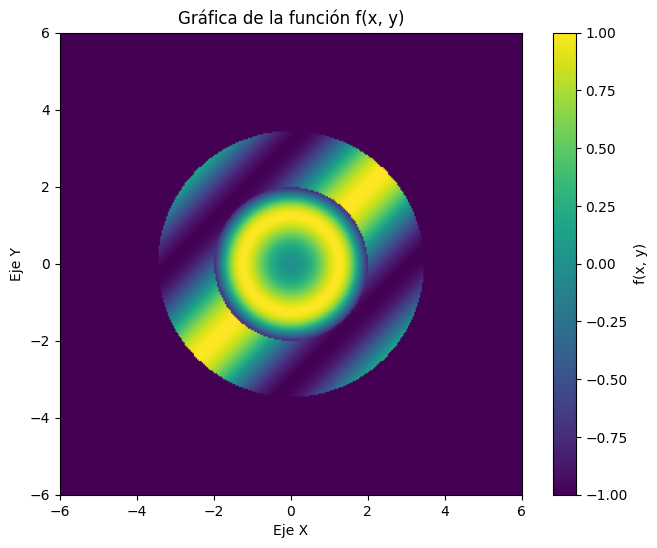

In [7]:
#creamos la malla
x = np.linspace(-6, 6, 300)
y = np.linspace(-6, 6, 300)
X, Y = np.meshgrid(x, y)

#Inicializar matriz Z
Z = np.zeros_like(X)

# Calcular la función f dando las regiones de la función a trozos
region_1 = (X**2 + Y**2) <= 4
region_2 = (4 < (X**2 + Y**2)) & ((X**2 + Y**2) < 12)
region_3 = (12 <= (X**2 + Y**2))

#asignación de los valores por partes
Z[region_1] = np.sin(X[region_1]**2 + Y[region_1]**2)
Z[region_2] = np.cos(X[region_2] - Y[region_2])
Z[region_3] = -1

plt.figure(figsize=(8, 6))
plt.imshow(Z, extent=[-6, 6, -6, 6], origin='lower', cmap='viridis')
plt.colorbar(label='f(x, y)')
plt.xlabel('Eje X')
plt.ylabel('Eje Y')
plt.title('Gráfica de la función f(x, y)')
plt.grid(False)
plt.show()


3. Resuelva el siguiente sistema de ecuaciones lineales:

$$\begin{equation}
\begin{array}{rcl}
2x_1 - x_2 + 3x_3 + x_4 - x_5 &=& 7 \\
x_1 + x_2 - x_3 + 2x_4 + x_5  &=& 4 \\
3x_1 - x_2 + x_3 - x_4 + 2x_5 &=& 10 \\
x_1 + x_2 + x_3 + x_4 + x_5 &=& 5 \\
-2x_1 + 4x_2 + x_3 - 3x_4 + x_5  &=& 0
\end{array}
\end{equation}$$

3.1 Resuelva el sistema.

3.2 Verifique la solución sustituyéndola en la ecuación original y evaluando $|| Ax - b ||$
.


In [8]:
#ingresamos la matriz de coeficientes
A = np.array([[2,-1,3,1,-1],
              [1,1,-1,2,1],
              [3,-1,1,-1,2],[1,1,1,1,1],[-2,4,1,-3,1]])

In [9]:
A

array([[ 2, -1,  3,  1, -1],
       [ 1,  1, -1,  2,  1],
       [ 3, -1,  1, -1,  2],
       [ 1,  1,  1,  1,  1],
       [-2,  4,  1, -3,  1]])

In [10]:
#Resolviendo el sistema con el método de Cramer
D1 = np.array([[7,-1,3,1,-1],
              [4,1,-1,2,1],
              [10,-1,1,-1,2],[5,1,1,1,1],[0,4,1,-3,1]])

In [11]:
D1

array([[ 7, -1,  3,  1, -1],
       [ 4,  1, -1,  2,  1],
       [10, -1,  1, -1,  2],
       [ 5,  1,  1,  1,  1],
       [ 0,  4,  1, -3,  1]])

In [12]:
D2 = np.array([[2,7,3,1,-1],
              [1,4,-1,2,1],
              [3,10,1,-1,2],[1,5,1,1,1],[-2,0,1,-3,1]])

In [13]:
D2

array([[ 2,  7,  3,  1, -1],
       [ 1,  4, -1,  2,  1],
       [ 3, 10,  1, -1,  2],
       [ 1,  5,  1,  1,  1],
       [-2,  0,  1, -3,  1]])

In [14]:
D3 =np.array([[2,-1,7,1,-1],
              [1,1,4,2,1],
              [3,-1,10,-1,2],[1,1,5,1,1],[-2,4,0,-3,1]])

In [15]:
D3

array([[ 2, -1,  7,  1, -1],
       [ 1,  1,  4,  2,  1],
       [ 3, -1, 10, -1,  2],
       [ 1,  1,  5,  1,  1],
       [-2,  4,  0, -3,  1]])

In [16]:
D4 =np.array([[2,-1,3,7,-1],
              [1,1,-1,4,1],
              [3,-1,1,10,2],[1,1,1,5,1],[-2,4,1,0,1]])

In [17]:
D4

array([[ 2, -1,  3,  7, -1],
       [ 1,  1, -1,  4,  1],
       [ 3, -1,  1, 10,  2],
       [ 1,  1,  1,  5,  1],
       [-2,  4,  1,  0,  1]])

In [18]:
D5=np.array([[2,-1,3,1,7],
              [1,1,-1,2,4],
              [3,-1,1,-1,10],[1,1,1,1,5],[-2,4,1,-3,0]])

In [19]:
D5

array([[ 2, -1,  3,  1,  7],
       [ 1,  1, -1,  2,  4],
       [ 3, -1,  1, -1, 10],
       [ 1,  1,  1,  1,  5],
       [-2,  4,  1, -3,  0]])

In [20]:
x_1 = np.linalg.det(D1)/np.linalg.det(A)
x_2 = np.linalg.det(D2)/np.linalg.det(A)
x_3 = np.linalg.det(D3)/np.linalg.det(A)
x_4 = np.linalg.det(D4)/np.linalg.det(A)
x_5 = np.linalg.det(D5)/np.linalg.det(A)
print(x_1, x_2, x_3, x_4, x_5)

3.931034482758626 1.666666666666668 0.2758620689655176 -0.44827586206896525 -0.42528735632183867


In [21]:
#otra forma de encontrar la solucion del sistema
b = np.array([7,4,10,5,0])

x=np.linalg.solve(A, b)

In [22]:
x

array([ 3.93103448,  1.66666667,  0.27586207, -0.44827586, -0.42528736])

In [23]:
Ax=np.dot(A,x)

In [24]:
#calculamos ||Ax - b||
np.linalg.norm(Ax - b)


np.float64(2.288783399261119e-15)

 4. Genera un array de $400$ números aleatorios con distribución normal de media $10$ y desviación estándar $2$.

4.1 Calcula la media y desviación estándar de la muestra.

¿Cuántos valores están entre $8$ y $12$?

In [25]:
import random as rd
import numpy as np

In [26]:
#creamos 400 numeros aleatorios
numeros=np.random.normal(10,2,400)  #distribucion normal, media 10 y desviacion estandar 2
numeros

array([12.28629787, 10.42962252, 10.06063651, 10.69902188, 14.02873286,
       11.59365785, 10.301914  ,  9.62358112,  6.78137701, 11.35220116,
        8.98169691,  7.32912741, 12.01081349, 10.34655345,  9.37587801,
       11.73697428,  6.21554351,  6.48354856, 11.3818973 ,  7.17451522,
        9.56411248,  7.73035796,  7.05501579,  8.15709077, 14.01217925,
       11.4531429 ,  9.01932784, 14.20652454, 10.81809273,  9.12874567,
       12.61390927,  9.67622437, 13.89116127,  8.37800301, 15.05679341,
        6.43793303,  9.26969781,  9.40315455,  9.56674825,  7.81469805,
       10.54270112, 13.34241053, 10.66674345,  8.44173385,  9.69660329,
        7.73933973,  8.17315351,  5.58449525, 11.59387468, 11.50727538,
        9.35482331,  9.49351385, 10.23913115, 11.81546286,  8.24520219,
        9.17368789, 10.05025657, 10.41951291, 13.65647951, 10.27153843,
       10.27859167, 11.76679638, 11.68162531,  9.87041508, 12.57444069,
        8.32925957, 11.88738132, 10.49657827, 13.1839564 ,  6.85

Calcular la media

$Media= \frac{1}{n} \sum_{i=1}^{n} x_{i}$

​


In [27]:
#calcular la media
suma = np.sum(numeros)
media = suma / len(numeros)
print("La media es:", media)

La media es: 10.107998655154748


In [28]:
#otra forma de obtener la media
media=np.mean(numeros)
media

np.float64(10.107998655154748)

calcular la desviacion estandar

$s^{2}=\frac{1}{n-1} \sum_{i=1}^{n} (x_{i}-\bar{x})^{2}$

In [29]:
#calcular la desviacion estandar
suma_cuadrados = np.sum((numeros - media) ** 2)
desviacion_estandar = np.sqrt(suma_cuadrados / len(numeros))
print("La desviación estándar es:", desviacion_estandar)

La desviación estándar es: 1.9728901029318469


In [30]:
#otra forma de hacerlo
desviacion=np.std(numeros)
desviacion

np.float64(1.9728901029318469)

In [31]:
#Calcula cuantos valores hay entre 8 y 12
valores = np.sum((numeros >= 8) & (numeros <= 12))
valores

np.int64(276)

5.Simula una muestra de $200$ observaciones donde cada valor puede ser $'A'$, $'B'$ o $'C'$ con probabilidades $0.5$, $0.3$ y $0.2$, respectivamente (np.random.choice). Cuenta cuántas veces ocurre cada categoría.

In [32]:
#Muestra de 200 observaciones
muestra=np.random.choice(['A', 'B', 'C'], size=200, p=[0.5, 0.3, 0.2]) #valor que pueden tener y sus probabilidades

In [33]:
muestra

array(['B', 'A', 'C', 'B', 'A', 'A', 'B', 'A', 'B', 'A', 'A', 'B', 'A',
       'B', 'A', 'B', 'B', 'B', 'C', 'C', 'A', 'A', 'B', 'B', 'A', 'A',
       'A', 'C', 'A', 'A', 'A', 'B', 'A', 'A', 'C', 'B', 'B', 'A', 'C',
       'A', 'C', 'A', 'A', 'B', 'A', 'B', 'A', 'A', 'C', 'B', 'C', 'C',
       'A', 'B', 'B', 'A', 'A', 'A', 'C', 'A', 'B', 'A', 'B', 'C', 'B',
       'B', 'C', 'B', 'A', 'B', 'A', 'A', 'A', 'B', 'C', 'B', 'B', 'A',
       'B', 'A', 'A', 'A', 'B', 'A', 'A', 'C', 'A', 'A', 'B', 'B', 'C',
       'A', 'B', 'B', 'C', 'A', 'A', 'A', 'C', 'B', 'A', 'B', 'C', 'B',
       'A', 'A', 'C', 'B', 'A', 'C', 'A', 'B', 'A', 'B', 'C', 'A', 'A',
       'B', 'C', 'A', 'C', 'A', 'C', 'A', 'A', 'A', 'A', 'A', 'A', 'A',
       'A', 'C', 'A', 'C', 'A', 'B', 'B', 'A', 'A', 'A', 'A', 'C', 'A',
       'A', 'B', 'A', 'A', 'A', 'C', 'B', 'A', 'A', 'B', 'A', 'B', 'B',
       'A', 'A', 'C', 'A', 'A', 'A', 'A', 'A', 'B', 'A', 'C', 'B', 'A',
       'A', 'B', 'B', 'A', 'B', 'B', 'B', 'B', 'A', 'C', 'C', 'B

In [34]:
#contar el numero de veces que sale   ′A′ ,  ′B′  o  ′C′
unique_values, counts = np.unique(muestra, return_counts=True)

In [35]:
for value, count in zip(unique_values, counts):
    print(f"Valor '{value}': {count} veces")


Valor 'A': 100 veces
Valor 'B': 64 veces
Valor 'C': 36 veces


6. Genera una señal base (por ejemplo, todos $100$) y agrégale ruido gaussiano con desviación $5$.
- Grafica la señal ruidosa.
-Calcula el error medio cuadrático con respecto a la señal original:
$$RMSE = \sqrt{\frac{1}{n-1} \sum_{i=1}^{n} (x_{i}-\bar{x})^{2}}$$
Donde:

 -$y_{i}$ son los valores de la señal base

 -$\hat{y}_{i}$ son los valores de la señal ruidosa

 -$n$ es el número total de observaciones.



In [36]:
# 1. Generar señal base
n = 100  # número de observaciones
señal_base = np.full(n, 100)  # vector de 100 elementos con valor 100

In [37]:
#Agréga ruido gaussiano con desviación 5
ruido = np.random.normal(loc=0, scale=5, size=n)
señal_ruidosa = señal_base + ruido

In [38]:
import matplotlib.pyplot as plt

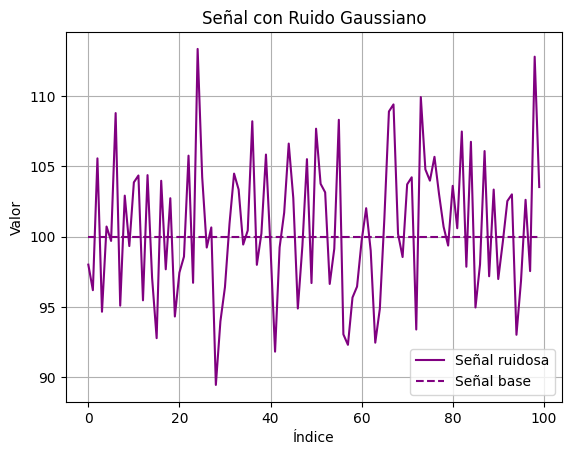

In [39]:
#Grafica la señal ruidosa
plt.plot(señal_ruidosa, label='Señal ruidosa', color='purple')
plt.plot(señal_base, label='Señal base', linestyle='--', color='purple')
plt.title('Señal con Ruido Gaussiano')
plt.xlabel('Índice')
plt.ylabel('Valor')
plt.legend()
plt.grid(True)
plt.show()

In [40]:
#Calcula el error medio cuadratico con respecto a la señal original
rmse = np.sqrt(np.mean((señal_base - señal_ruidosa)**2))
print(f"Error cuadrático medio (RMSE): {rmse:.2f}")

Error cuadrático medio (RMSE): 4.92


7.  Dada la siguiente lista:

cadenas = [ ' juan perez!!', 'ana# LOPEZ? ', 'm@rio@@gomez', 'luis #MORA%%', 'carla!!méndóza ', 'PEDRO?ROSALES###', 'sofia#cano ', 'miguel//torres', 'lucia #ramirez:', ' josé+fernández ', ' camila#RUIZ', 'marcoantonio&', 'isaBel!!GARZA', '#roberto flores* ', ' emiLIA?Reyes!', 'DANIEL* #Martinez', ' andrés#s@las', 'pablo TORO/', ' yeSEnIa!lópez ', 'elena#morales?', 'Nicolásrodríguez', ' carmen?LUNA:', 'Rosa#AVILA', 'oscar?pineda;', 'alejandra!ríos+', 'IGNACIO#HERRERA ', ' sergioMENDOZA', 'tomás#ramírez=', 'ANDREA!MORENO?', '#manuel ortíz ', 'cristinaFLORES@', ' arturo#valdez;', 'LAURAméndez', 'mariana?ibarra!', ' esteban#quiroz ', 'valeria!CASTILLO', 'renata#DE la cruz', 'fernando?Vega:', 'irma!ZAPATA%', 'francisco#romero ', 'aliciaLara=', 'liliana#MENDEZ&', 'matías#galván;', '#ricardo!Ríos', ' catalinaALVARADO%', 'gustavo!morales+', 'natalia#VILLARREAL:', 'andréapáez;', ' Ramónsalinas!', ' david#molina ' ]

-Limpie la lista 'cadenas'

-Obtenga 50 etiquetas con el código: [f'id_{i:03}' for i in range(1, 51)]

-Obtenga un objeto Series con la lista 'cadenas' indexado con las etiquetas obtenidas.


In [41]:
#definimos la lista cadenas
cadenas = [ ' juan perez!!', 'ana# LOPEZ? ', 'm@rio @@gomez', 'luis #MORA%%', 'carla !!méndóza ', 'PEDRO ?ROSALES###', 'sofia #cano ', 'miguel //torres', 'lucia #ramirez:', ' josé +fernández ', ' camila #RUIZ', 'marco antonio&', 'isaBel !!GARZA', '#roberto flores* ', ' emiLIA? Reyes!', 'DANIEL* #Martinez', ' andrés #s@las', 'pablo TORO/', ' yeSEnIa! lópez ', 'elena #morales?', 'Nicolás rodríguez', ' carmen ?LUNA:', 'Rosa #AVILA', 'oscar ?pineda;', 'alejandra !ríos+', 'IGNACIO #HERRERA ', ' sergio MENDOZA', 'tomás #ramírez=', 'ANDREA !MORENO?', '#manuel ortíz ', 'cristina FLORES@', ' arturo #valdez;', 'LAURA méndez', 'mariana ?ibarra!', ' esteban #quiroz ', 'valeria !CASTILLO', 'renata #DE la cruz', 'fernando ?Vega:', 'irma! ZAPATA%', 'francisco #romero ', 'alicia Lara=', 'liliana #MENDEZ&', 'matías #galván;', '#ricardo! Ríos', ' catalina ALVARADO%', 'gustavo! morales+', 'natalia# VILLARREAL:', 'andréa páez;', ' Ramón salinas!', ' david #molina ' ]

In [42]:
cadenas

[' juan perez!!',
 'ana# LOPEZ? ',
 'm@rio @@gomez',
 'luis #MORA%%',
 'carla !!méndóza ',
 'PEDRO ?ROSALES###',
 'sofia #cano ',
 'miguel //torres',
 'lucia #ramirez:',
 ' josé +fernández ',
 ' camila #RUIZ',
 'marco antonio&',
 'isaBel !!GARZA',
 '#roberto flores* ',
 ' emiLIA? Reyes!',
 'DANIEL* #Martinez',
 ' andrés #s@las',
 'pablo TORO/',
 ' yeSEnIa! lópez ',
 'elena #morales?',
 'Nicolás rodríguez',
 ' carmen ?LUNA:',
 'Rosa #AVILA',
 'oscar ?pineda;',
 'alejandra !ríos+',
 'IGNACIO #HERRERA ',
 ' sergio MENDOZA',
 'tomás #ramírez=',
 'ANDREA !MORENO?',
 '#manuel ortíz ',
 'cristina FLORES@',
 ' arturo #valdez;',
 'LAURA méndez',
 'mariana ?ibarra!',
 ' esteban #quiroz ',
 'valeria !CASTILLO',
 'renata #DE la cruz',
 'fernando ?Vega:',
 'irma! ZAPATA%',
 'francisco #romero ',
 'alicia Lara=',
 'liliana #MENDEZ&',
 'matías #galván;',
 '#ricardo! Ríos',
 ' catalina ALVARADO%',
 'gustavo! morales+',
 'natalia# VILLARREAL:',
 'andréa páez;',
 ' Ramón salinas!',
 ' david #molina ']

In [43]:
#Aplicamos la funcion para limpiar
import re
def limpiar_cadenas(strings):
    result = []
    for value in strings:
        value = value.strip()  # suprime blancos u otro carácter especificado del final
                               #o del principio de una expresión
        value = re.sub('[!@/+&*#?%=;:]', '', value) #reemplaza todas las ocurrencias de un patrón
                                           #por el texto que especifiquemos
        value = value.title() #convierte la primera letra de cada palabra de una cadena
                              # a mayúsculas.
        result.append(value)
    return result

In [44]:
cadenas_limpias = limpiar_cadenas(cadenas)

In [45]:
cadenas_limpias.sort()

In [46]:
cadenas_limpias

['Alejandra Ríos',
 'Alicia Lara',
 'Ana Lopez',
 'Andrea Moreno',
 'Andréa Páez',
 'Andrés Slas',
 'Arturo Valdez',
 'Camila Ruiz',
 'Carla Méndóza',
 'Carmen Luna',
 'Catalina Alvarado',
 'Cristina Flores',
 'Daniel Martinez',
 'David Molina',
 'Elena Morales',
 'Emilia Reyes',
 'Esteban Quiroz',
 'Fernando Vega',
 'Francisco Romero',
 'Gustavo Morales',
 'Ignacio Herrera',
 'Irma Zapata',
 'Isabel Garza',
 'José Fernández',
 'Juan Perez',
 'Laura Méndez',
 'Liliana Mendez',
 'Lucia Ramirez',
 'Luis Mora',
 'Manuel Ortíz',
 'Marco Antonio',
 'Mariana Ibarra',
 'Matías Galván',
 'Miguel Torres',
 'Mrio Gomez',
 'Natalia Villarreal',
 'Nicolás Rodríguez',
 'Oscar Pineda',
 'Pablo Toro',
 'Pedro Rosales',
 'Ramón Salinas',
 'Renata De La Cruz',
 'Ricardo Ríos',
 'Roberto Flores',
 'Rosa Avila',
 'Sergio Mendoza',
 'Sofia Cano',
 'Tomás Ramírez',
 'Valeria Castillo',
 'Yesenia López']